In [ ]:
from google.colab import drive
import xarray as xr

# This will prompt for authorization.
drive.mount('/content/drive')

# Now you can access your Google Drive as a local file system
data = xr.open_dataset('/content/drive/MyDrive/DAYMET tmin data/daymet_v4_daily_na_tmin_2000.nc')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data

<xarray.Dataset>
Dimensions:                  (x: 7814, y: 8075, time: 365, nv: 2)
Coordinates:
  * x                        (x) float32 -4.56e+06 -4.559e+06 ... 3.253e+06
  * y                        (y) float32 4.984e+06 4.983e+06 ... -3.09e+06
    lat                      (y, x) float32 ...
    lon                      (y, x) float32 ...
  * time                     (time) datetime64[ns] 2000-01-01T12:00:00 ... 20...
Dimensions without coordinates: nv
Data variables:
    yearday                  (time) int16 ...
    time_bnds                (time, nv) datetime64[ns] ...
    lambert_conformal_conic  int16 ...
    tmin                     (time, y, x) float32 ...
Attributes:
    start_year:        2000
    source:            Daymet Software Version 4.0
    Version_software:  Daymet Software Version 4.0
    Version_data:      Daymet Data Version 4.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import xarray as xr
from shapely import geometry
import cartopy.feature as cfeature
from matplotlib.colors import Normalize

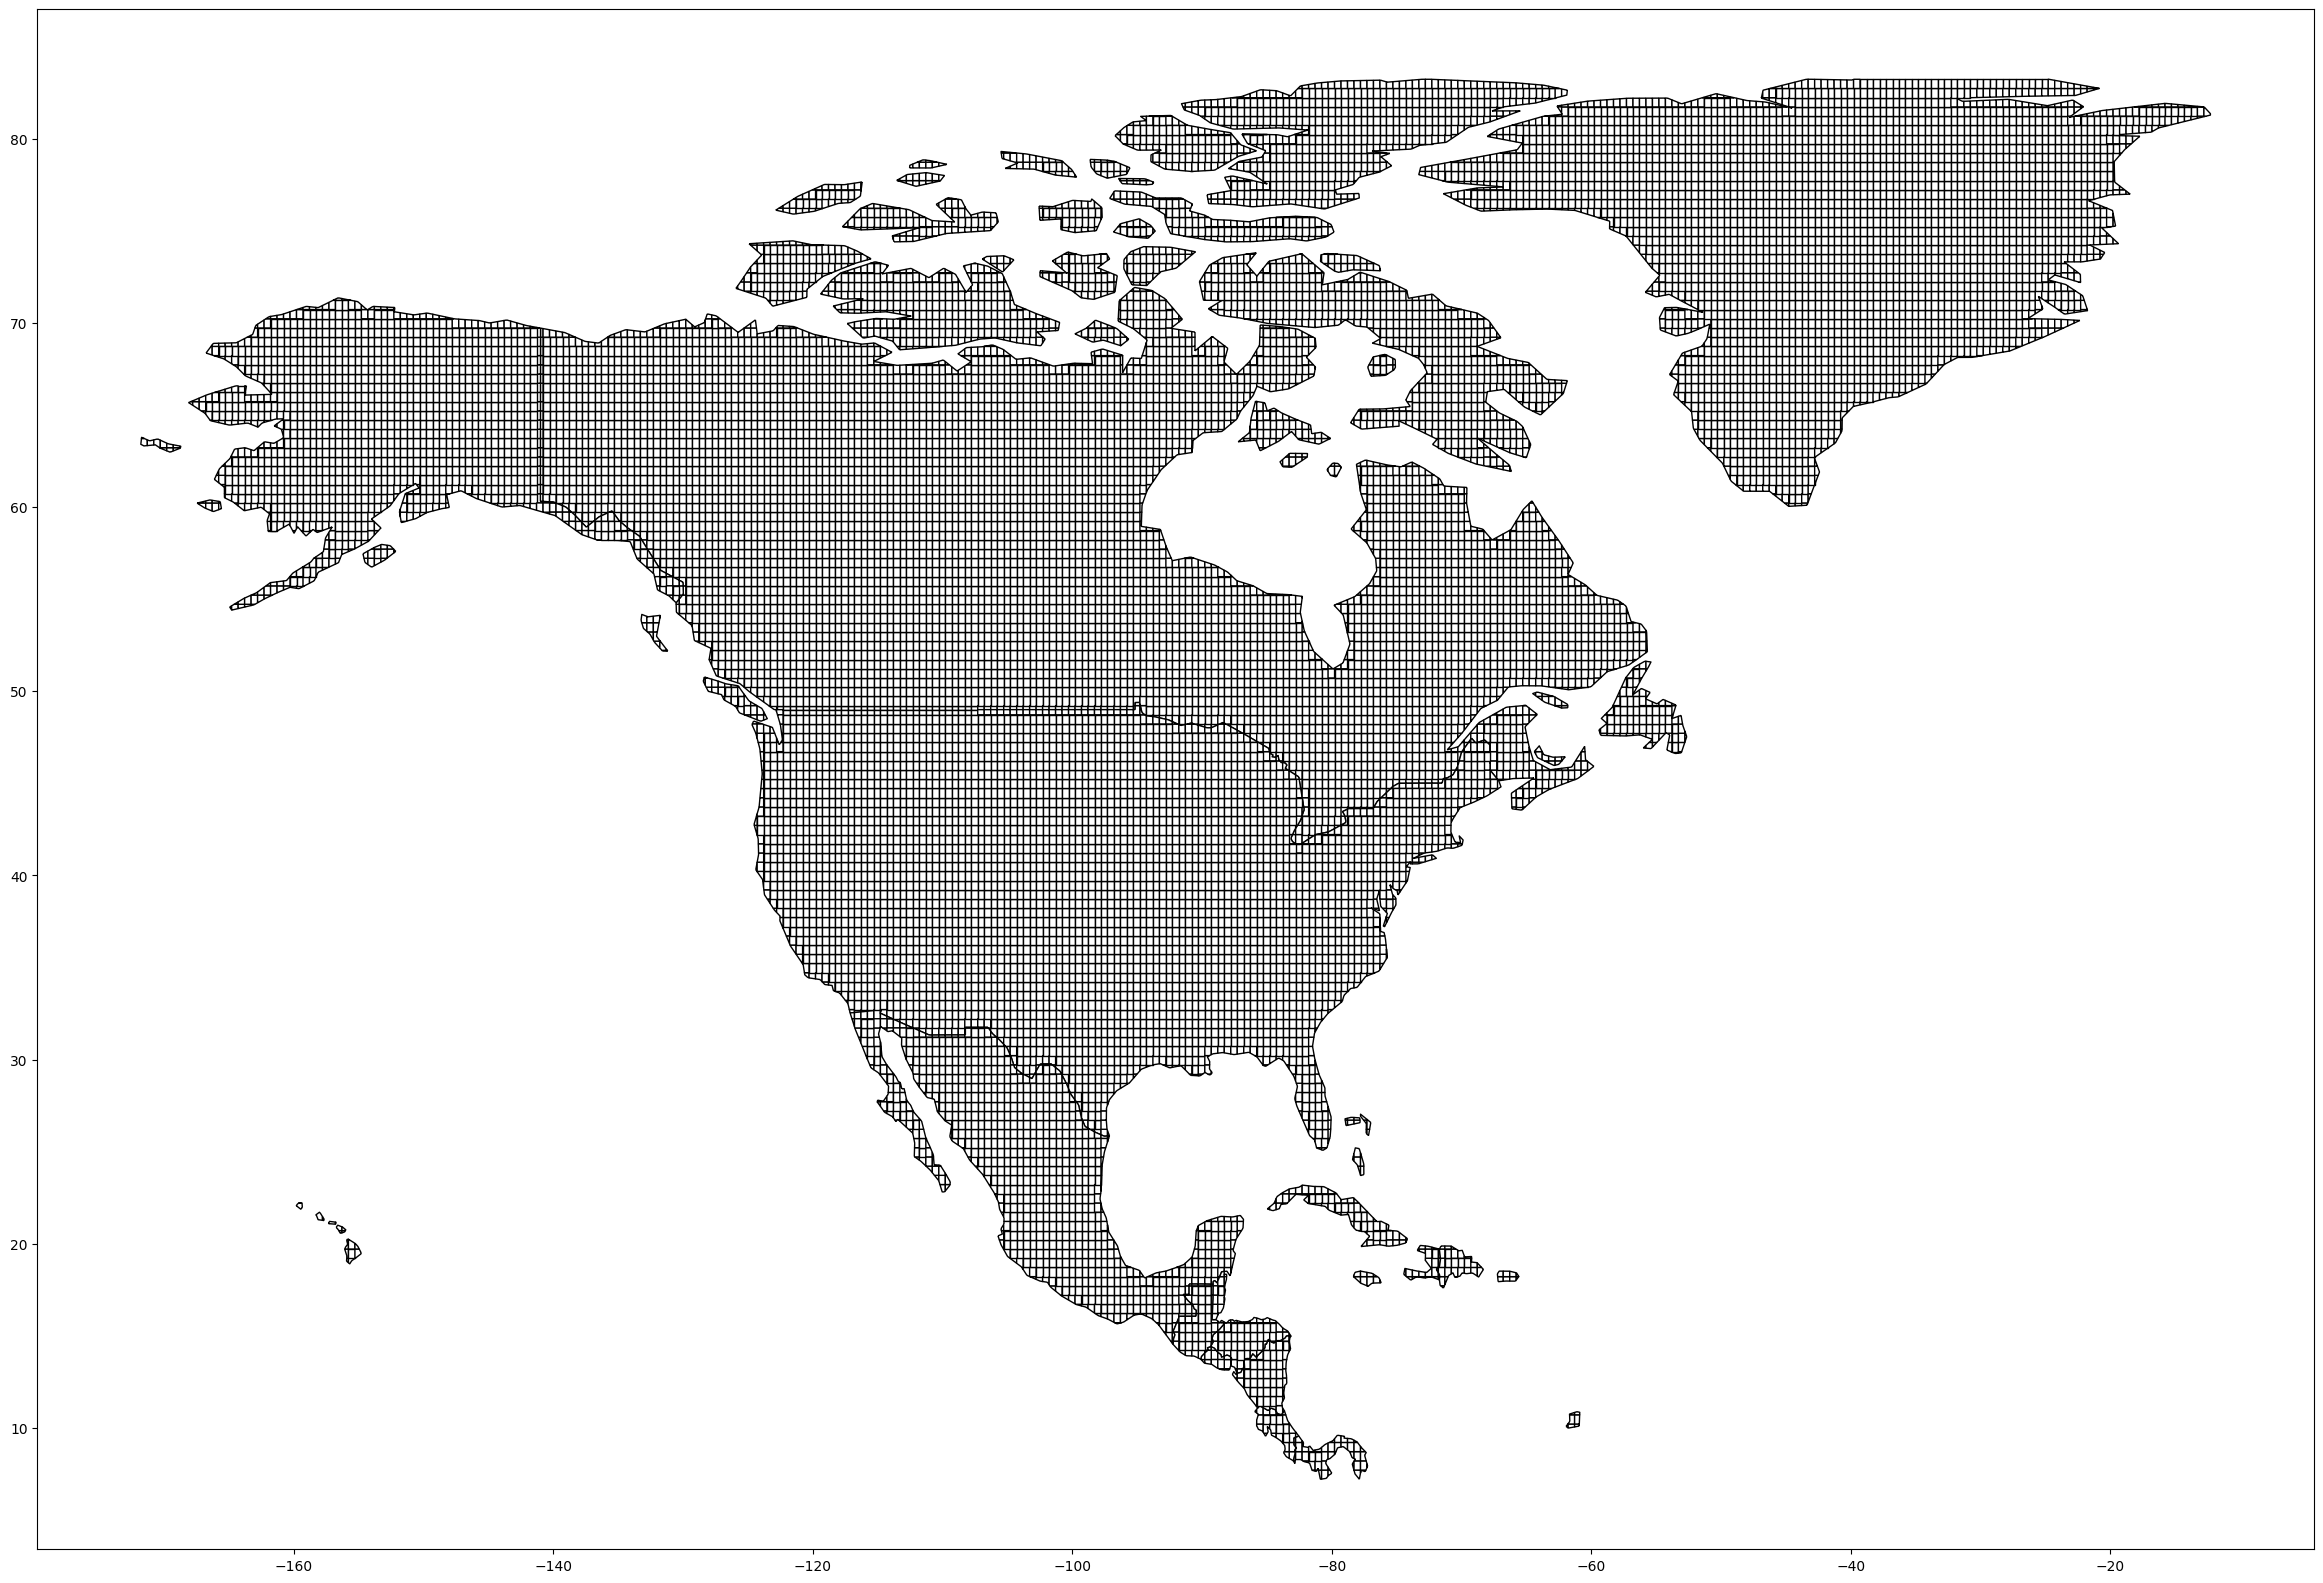

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))
grsm_poly = gpd.read_file('/content/drive/MyDrive/2000TMINNCFILES/regrid.shp')
shp = grsm_poly.plot(ax=ax, color='white', edgecolor='black')
grsm_poly.crs
plt.show()



In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 26.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


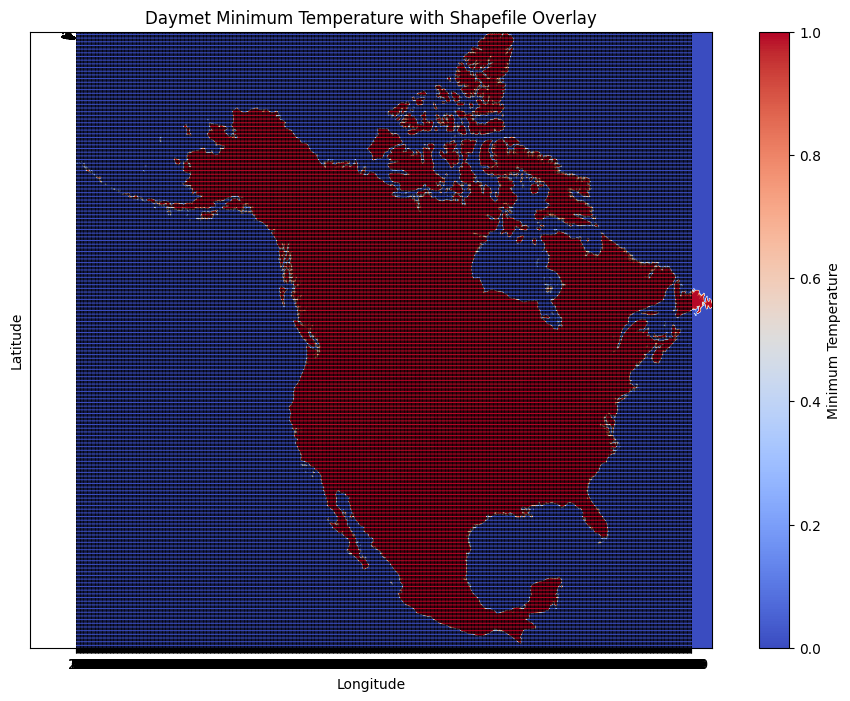

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Load the shapefile
shapefile_path = "/content/drive/MyDrive/2000TMINNCFILES/regrid.shp"
shapefile = gpd.read_file(shapefile_path)

# Load the Daymet data
daymet_file = "/content/drive/MyDrive/2000TMINNCFILES/day1.nc"
daymet_data = rasterio.open(daymet_file)

# Specify the target CRS for the shapefile (e.g., EPSG:4326)
target_crs = rasterio.crs.CRS.from_epsg(4326)

# Reproject the shapefile to match the CRS of the Daymet data
shapefile_reprojected = shapefile.to_crs(target_crs)

# Get the Daymet data
tmin = daymet_data.read(1)

# Compute the minimum and maximum temperature values for normalization (excluding NaN values)
min_temp = float(np.nanmin(tmin))
max_temp = float(np.nanmax(tmin))

# Normalize the minimum  temperature values between 0 and 1
norm = Normalize(vmin=min_temp, vmax=max_temp)
normalized_tmax = norm(tmin)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the Daymet data with gradient color scheme
im = ax.imshow(normalized_tmax, cmap='coolwarm', extent=daymet_data.bounds, origin='upper')

# Plot the reprojected shapefile
shapefile_reprojected.plot(ax=ax, facecolor='none', edgecolor='black')

# Add visible black grid lines with 500m spacing
x_res = daymet_data.res[0] * 10  # Convert the resolution to match the shapefile units
y_res = daymet_data.res[1] * 10
x_ticks = np.arange(daymet_data.bounds.left, daymet_data.bounds.right, x_res)
y_ticks = np.arange(daymet_data.bounds.bottom, daymet_data.bounds.top, y_res)
ax.grid(color='black', linestyle='--', linewidth=0.5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Set the aspect ratio to 'equal' for a better visualization
ax.set_aspect('equal')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, label='Minimum Temperature')

# Set plot title and labels
ax.set_title('Daymet Minimum Temperature with Shapefile Overlay')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


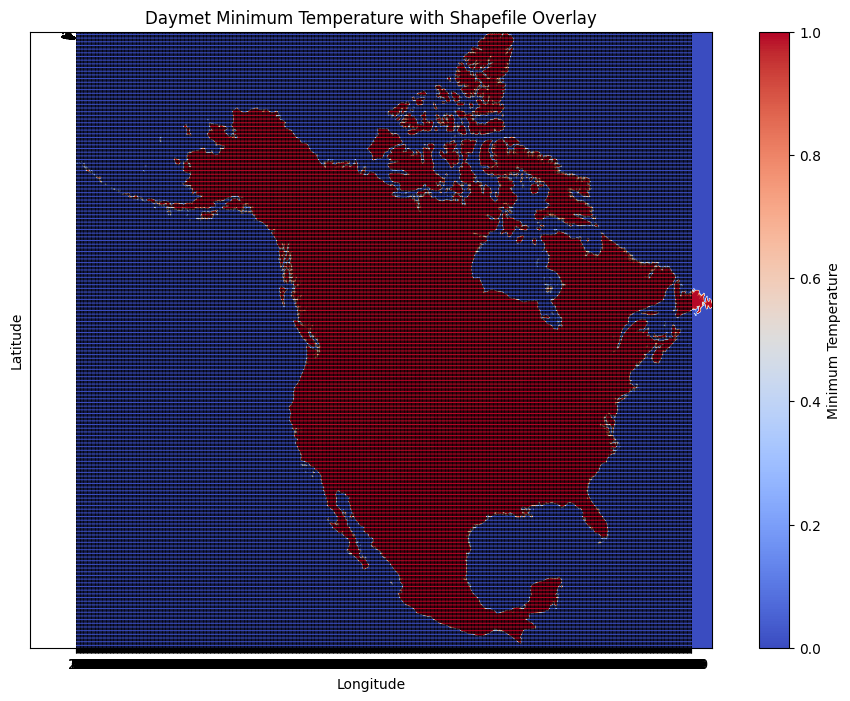

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Load the shapefile
shapefile_path = "/content/drive/MyDrive/2000TMINNCFILES/regrid.shp"
shapefile = gpd.read_file(shapefile_path)

# Load the Daymet data
daymet_file = "/content/drive/MyDrive/2000TMINNCFILES/day1.nc"
daymet_data = rasterio.open(daymet_file)

# Specify the target CRS for the shapefile (e.g., EPSG:4326)
target_crs = rasterio.crs.CRS.from_epsg(4326)

# Reproject the shapefile to match the CRS of the Daymet data
shapefile_reprojected = shapefile.to_crs(target_crs)

# Get the Daymet data
tmin = daymet_data.read(1)

# Define the minimum and maximum values for color normalization
vmin = np.nanmin(tmin)
vmax = np.nanmax(tmin)

# Normalize the Daymet data
norm = Normalize(vmin=vmin, vmax=vmax)
normalized_tmax = norm(tmin)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the Daymet data with gradient color scheme
im = ax.imshow(normalized_tmax, cmap='coolwarm', extent=daymet_data.bounds, origin='upper')

# Plot the reprojected shapefile
shapefile_reprojected.plot(ax=ax, facecolor='none', edgecolor='black')

# Add visible black grid lines with 500m spacing
x_res = daymet_data.res[0] * 10  # Convert the resolution to match the shapefile units
y_res = daymet_data.res[1] * 10
x_ticks = np.arange(daymet_data.bounds.left, daymet_data.bounds.right, x_res)
y_ticks = np.arange(daymet_data.bounds.bottom, daymet_data.bounds.top, y_res)
ax.grid(color='black', linestyle='--', linewidth=0.5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

# Set the aspect ratio to 'equal' for a better visualization
ax.set_aspect('equal')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, label='Minimum Temperature')

# Set plot title and labels
ax.set_title('Daymet Minimum Temperature with Shapefile Overlay')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


In [ ]:
import geopandas as gpd

# Load the shapefile
shapefile_path = "/content/drive/MyDrive/2000TMINNCFILES/regrid.shp"
gdf = gpd.read_file(shapefile_path)

# Get the CRS of the shapefile
crs = gdf.crs

# Print the CRS
print(crs)

EPSG:4326


In [ ]:
!pip install matplotlib geopandas xarray cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 59.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.4 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11080587 sha256=aba92dbc6e886584c1812a4507d3955ad14ff4e19fa123d736d6e4dcd9398b08
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


Visualizing Each Day's NC File Over a Shapefile of North America

In [ ]:
import xarray as xr

# Open the dataset with chunking
data = xr.open_dataset('/content/drive/MyDrive/DAYMET tmin data/daymet_v4_daily_na_tmin_2000.nc', chunks={'time': 10, 'x': 1000, 'y': 1000})


In [ ]:
data

<xarray.Dataset>
Dimensions:                  (x: 7814, y: 8075, time: 365, nv: 2)
Coordinates:
  * x                        (x) float32 -4.56e+06 -4.559e+06 ... 3.253e+06
  * y                        (y) float32 4.984e+06 4.983e+06 ... -3.09e+06
    lat                      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    lon                      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
  * time                     (time) datetime64[ns] 2000-01-01T12:00:00 ... 20...
Dimensions without coordinates: nv
Data variables:
    yearday                  (time) int16 dask.array<chunksize=(10,), meta=np.ndarray>
    time_bnds                (time, nv) datetime64[ns] dask.array<chunksize=(10, 2), meta=np.ndarray>
    lambert_conformal_conic  int16 ...
    tmin                     (time, y, x) float32 dask.array<chunksize=(10, 1000, 1000), meta=np.ndarray>
Attributes:
    start_year:        2000
    source:            Daymet Software Version 4.0
    Version_software:  Daymet Software Version 4.0
    Version_data:      Daymet Data Version 4.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...

In [ ]:

downsampled_data = data.coarsen(time=10, x=10, y=10, boundary='trim').mean()



In [ ]:
downsampled_data

<xarray.Dataset>
Dimensions:                  (time: 36, nv: 2, y: 807, x: 781)
Coordinates:
  * x                        (x) float32 -4.556e+06 -4.546e+06 ... 3.244e+06
  * y                        (y) float32 4.98e+06 4.97e+06 ... -3.08e+06
    lat                      (y, x) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
    lon                      (y, x) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
  * time                     (time) datetime64[ns] 2000-01-06 ... 2000-12-21
Dimensions without coordinates: nv
Data variables:
    yearday                  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bnds                (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    lambert_conformal_conic  int16 -32767
    tmin                     (time, y, x) float32 dask.array<chunksize=(1, 100, 100), meta=np.ndarray>
Attributes:
    start_year:        2000
    source:            Daymet Software Version 4.0
    Version_software:  Daymet Software Version 4.0
    Version_data:      Daymet Data Version 4.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...

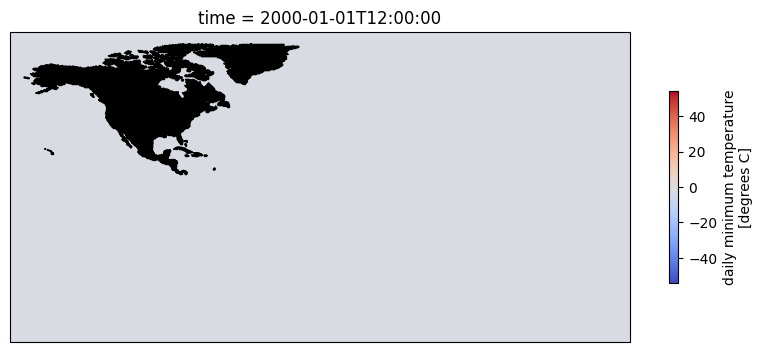

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import geopandas as gpd
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

# Define the path to your shapefile and NetCDF data
shapefile_path = '/content/drive/MyDrive/2000TMINNCFILES/regrid.shp'
nc_path = '/content/drive/MyDrive/2000TMINNCFILES/day1.nc'

# Load your shapefile and NetCDF data
shapefile = gpd.read_file(shapefile_path)
nc_data = xr.open_dataset(nc_path)

# Downsample the data with 'trim' boundary option
downsampled_data = nc_data.coarsen(x=10, y=10, boundary='trim').mean()

# Get the temperature variable from the downsampled data
temperature_variable = downsampled_data['tmin']  # assuming 'tmin' is the variable for temperature

# Create a new figure and set up the projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add the shapefile as a feature
shape_feature = ShapelyFeature(Reader(shapefile_path).geometries(), ccrs.PlateCarree(), edgecolor='black')
ax.add_feature(shape_feature)

# Plot the temperature variable on the map with a color bar
temperature_variable.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5}, cmap='coolwarm')

# Save the figure as a PNG file
plt.savefig('day1.png')

# Display the figure
plt.show()


Creating a PNG Image for Each Day's Plot

In [ ]:
for i in range(10, 15):  # assuming you have files for 365 days
    nc_path = f'/content/drive/MyDrive/2000TMINNCFILES/day{i}.nc'
    nc_data = xr.open_dataset('/content/drive/MyDrive/DAYMET tmin data/daymet_v4_daily_na_tmin_2000.nc')
    temperature_variable = nc_data['tmin']

    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    shape_feature = ShapelyFeature(Reader(shapefile_path).geometries(), ccrs.PlateCarree(), edgecolor='black')
    ax.add_feature(shape_feature)
    temperature_variable.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5}, cmap='coolwarm')
    plt.savefig(f'day{i}.png')
    plt.close(fig)  # close the figure to free memory


Creating an Animation from the Images

In [ ]:
import imageio

images = []
for i in range(1, 366):
    images.append(imageio.imread(f'day{i}.png'))

imageio.mimsave('temperature_animation.gif', images, fps=10)  # adjust fps (frames per second) as needed
